In [28]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [29]:
data_raw = pd.read_csv('./data/svm/watermelon_3a.csv')
data_raw.head()

,编号,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜
0,1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.460,是
1,2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,是
2,3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,是
3,4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,是
4,5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,是


In [30]:
data = data_raw.copy()
cate_dict = {'是':0, '否':1}
data['好瓜'] = pd.factorize(data['好瓜'])[0]
data.iloc[:, 1:7] = pd.get_dummies(data.iloc[:, 1:7])
data.head(10)

,编号,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜
0,1,0,0,1,0,0,1,0.697,0.460,0
1,2,1,0,0,0,0,1,0.774,0.376,0
2,3,1,0,0,0,0,1,0.634,0.264,0
3,4,0,0,1,0,0,1,0.608,0.318,0
4,5,0,1,0,0,0,1,0.556,0.215,0
5,6,0,0,1,0,1,0,0.403,0.237,0
6,7,1,0,0,0,1,0,0.481,0.149,0
7,8,1,0,0,0,1,0,0.437,0.211,0
8,9,1,0,0,0,1,0,0.666,0.091,1
9,10,0,0,1,1,0,0,0.243,0.267,1


In [31]:
train_set, test_set = train_test_split(data, test_size=0.3)

In [32]:
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')
svm_linear.fit(train_set.iloc[:, :-1], train_set.iloc[:, -1])
svm_rbf.fit(train_set.iloc[:, :-1], train_set.iloc[:, -1])

SVC()

In [33]:
result_linear = svm_linear.predict(test_set.iloc[:, :-1])
result_rbf = svm_rbf.predict(test_set.iloc[:, :-1])

In [34]:
acc_linear = (result_linear == test_set.iloc[:, -1].values).sum() / len(test_set)
acc_rbf = (result_rbf == test_set.iloc[:, -1].values).sum() / len(test_set)
acc_linear, acc_rbf

(0.8333333333333334, 0.8333333333333334)

In [35]:
svm_linear.support_vectors_, svm_rbf.support_vectors_

(array([[ 8.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.437,
          0.211],
        [10.   ,  0.   ,  0.   ,  1.   ,  1.   ,  0.   ,  0.   ,  0.243,
          0.267]]),
 array([[ 7.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.481,
          0.149],
        [ 6.   ,  0.   ,  0.   ,  1.   ,  0.   ,  1.   ,  0.   ,  0.403,
          0.237],
        [ 3.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.634,
          0.264],
        [ 8.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.437,
          0.211],
        [15.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.36 ,
          0.37 ],
        [11.   ,  0.   ,  1.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.245,
          0.057],
        [12.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.343,
          0.099],
        [10.   ,  0.   ,  0.   ,  1.   ,  1.   ,  0.   ,  0.   ,  0.243,
          0.267]]))

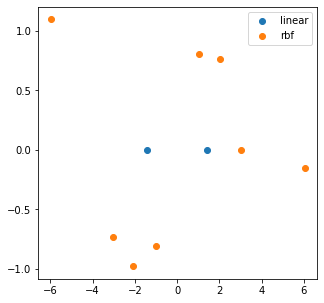

In [36]:
from sklearn.decomposition import PCA
linear_main = PCA(2).fit_transform(svm_linear.support_vectors_)
rbf_main = PCA(2).fit_transform(svm_rbf.support_vectors_)
plt.figure(figsize=(5, 5))
plt.scatter(linear_main[:, 0], linear_main[:, 1], label='linear')
plt.scatter(rbf_main[:, 0], rbf_main[:, 1], label='rbf')
plt.legend()
plt.show()